In [ ]:
#importing required libraries for the analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#loading the file from system onto dataframe variable

In [2]:
df = pd.read_csv(r"/Users/gurudarshan/UOG/Projects/project 4/hotel_bookings.csv")

In [7]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
#.info()provides info of all data in each column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Provides top 5 rows of the table to provide overview

In [8]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
#Provides dimensions of the table (rows , columns)

In [11]:
df.shape

(119390, 32)

In [13]:
#Data Cleaning 
#Let's check for duplicated rows

In [16]:
df1 = df.drop_duplicates()

In [18]:
df1.shape

(87396, 32)

In [19]:
#Reduced number of rows in df1 shows duplicated rows were dropped from the table.

In [20]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [21]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [23]:
#No booking should have no. of adults + no. of children + no. of babies as 0
#considering these rows as invalid booking
#Filtering these rows from data

In [24]:
filter =  (df1['children']==0) & (df1['adults']==0) & (df1['babies']==0)

In [27]:
df1[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,NaN,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,NaN,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,NaN,NaN,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,NaN,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,NaN,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [29]:
df1[filter].shape

(166, 32)

In [31]:
df1[~filter].shape

(87230, 32)

In [30]:
#We can see that 166 rows have values where all three colmns adults,children and babies are 0

In [32]:
df2 = df1[~filter]

In [33]:
df2.shape

(87230, 32)

In [ ]:
#Performing descriptive analysis

In [35]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [36]:
df2[['lead_time' , 'total_of_special_requests' , 'adr']].describe()

## getting (mean, median , std , percentile) of above features

,lead_time,total_of_special_requests,adr
count,87230.000000,87230.000000,87230.000000
mean,79.971019,0.698934,106.518031
std,86.058683,0.832051,54.891227
min,0.000000,0.000000,-6.380000
25%,11.000000,0.000000,72.250000
50%,49.000000,0.000000,98.200000
75%,125.000000,1.000000,134.100000
max,737.000000,5.000000,5400.000000


In [37]:
df2[['lead_time' , 'total_of_special_requests' , 'adr']].describe().T

## getting (mean, median , std , percentile) of above features

,count,mean,std,min,25%,50%,75%,max
lead_time,87230.0,79.971019,86.058683,0.00,11.00,49.0,125.0,737.0
total_of_special_requests,87230.0,0.698934,0.832051,0.00,0.00,0.0,1.0,5.0
adr,87230.0,106.518031,54.891227,-6.38,72.25,98.2,134.1,5400.0


In [41]:
import numpy as np

for col in ['lead_time', 'total_of_special_requests', 'adr']:
    print('feature name : {}'.format(col))
    
    for i in range(90, 101, 1):
        quantile_value = np.quantile(df2[col], q=i/100)  # Use i/100 to get the desired percentile
        print('{}th quantile value is {}'.format(i, quantile_value))
    print('\n')


feature name : lead_time
90th quantile value is 204.0
91th quantile value is 212.0
92th quantile value is 220.0
93th quantile value is 230.0
94th quantile value is 241.0
95th quantile value is 256.0
96th quantile value is 272.0
97th quantile value is 291.0
98th quantile value is 315.0
99th quantile value is 347.0
100th quantile value is 737.0


feature name : total_of_special_requests
90th quantile value is 2.0
91th quantile value is 2.0
92th quantile value is 2.0
93th quantile value is 2.0
94th quantile value is 2.0
95th quantile value is 2.0
96th quantile value is 2.0
97th quantile value is 3.0
98th quantile value is 3.0
99th quantile value is 3.0
100th quantile value is 5.0


feature name : adr
90th quantile value is 174.0
91th quantile value is 179.0
92th quantile value is 185.0
93th quantile value is 190.0
94th quantile value is 197.1
95th quantile value is 204.13300000000018
96th quantile value is 213.0
97th quantile value is 225.0
98th quantile value is 239.0
99th quantile value

In [42]:
#"adr" feature seems to have Outlier as 99th percentile value is 261 but 100th percentile(max value) is 5400 .. 

In [44]:
#SPATIAL ANALYSIS

In [46]:
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [53]:
not_cancelled = df2[df2['is_canceled']==0]

In [54]:
not_cancelled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [60]:
country = not_cancelled['country'].value_counts().reset_index()

In [61]:
country

,index,country
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


In [62]:
country.columns = ['country','No. of guests']

In [63]:
country

,country,No. of guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


In [64]:
!pip install chart-studio
!pip install plotly


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [65]:
### establishing the entire set-up of Plotly..

import chart_studio.plotly as py
## chart_studio provides a web-service for hosting graphs!

import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

## iplot() when working in a Jupyter Notebook to
## display the plot in the Ipython notebook.

init_notebook_mode(connected=True)

In [67]:
# show on map

map_guest = px.choropleth(data_frame = country , 
              locations= country['country'] , 
              color=country['No. of guests'] , 
              hover_name=country['country'] , 
              title= "Home country of Guests"
          
             )

In [68]:
map_guest.show()

In [69]:
#Bookings wrt market segment 

In [70]:
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [82]:
df2['market_segment'].value_counts().values

array([51553, 13855, 11780,  4922,  4200,   692,   226,     2])

In [83]:
df2['market_segment'].value_counts().index

Index(['Online TA', 'Offline TA/TO', 'Direct', 'Groups', 'Corporate',
       'Complementary', 'Aviation', 'Undefined'],
      dtype='object')

In [84]:
# pie plot

fig = px.pie(df2 , 
      values = df2['market_segment'].value_counts().values , 
      names = df2['market_segment'].value_counts().index)

In [85]:
fig.show()

In [86]:
## 7.. Total guests arrival on each day : 


In [87]:
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [88]:
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [90]:
#Convert 'arrival_date_month' to index value for date format
#Using dictionary to assign value to each month

In [96]:
df2.values

array([['Resort Hotel', 0, 342, ..., 0, 'Check-Out', '7/1/2015'],
       ['Resort Hotel', 0, 737, ..., 0, 'Check-Out', '7/1/2015'],
       ['Resort Hotel', 0, 7, ..., 0, 'Check-Out', '7/2/2015'],
       ...,
       ['City Hotel', 0, 34, ..., 4, 'Check-Out', '9/7/2017'],
       ['City Hotel', 0, 109, ..., 0, 'Check-Out', '9/7/2017'],
       ['City Hotel', 0, 205, ..., 2, 'Check-Out', '9/7/2017']],
      dtype=object)

In [102]:
df2['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [105]:
dict_month = {'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,
       'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6}

In [106]:
dict_month

{'July': 7,
 'August': 8,
 'September': 9,
 'October': 10,
 'November': 11,
 'December': 12,
 'January': 1,
 'February': 2,
 'March': 3,
 'April': 4,
 'May': 5,
 'June': 6}

In [107]:
df2['arrival_date_month_index'] = df2['arrival_date_month'].map(dict_month)

/var/folders/sy/gwh3by9524761shnjb3l2fnh0000gp/T/ipykernel_73352/1994572841.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [109]:
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_month_index'],
      dtype='object')

In [113]:
df2[['arrival_date_year',
       'arrival_date_month_index' , 'arrival_date_day_of_month']]

,arrival_date_year,arrival_date_month_index,arrival_date_day_of_month
0,2015,7,1
1,2015,7,1
2,2015,7,1
3,2015,7,1
4,2015,7,1
...,...,...,...
119385,2017,8,30
119386,2017,8,31
119387,2017,8,31
119388,2017,8,31


In [110]:
#using concatenation to join year + month + date for date format (convert them to string )

In [114]:
df2['arrival_date'] = df2['arrival_date_year'].astype(str) + '-' + df2['arrival_date_month_index'].astype(str) + '-' + df2['arrival_date_day_of_month'].astype(str)

In [115]:
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_index,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015,7,2015-7-1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015,7,2015-7-1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015,7,2015-7-1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015,7,2015-7-1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015,7,2015-7-1


In [116]:
# need table of sum of guests and grouping 'arrival_date' column

In [138]:
guest_f = df2.groupby('arrival_date').size().reset_index(name='Sum of Rows')

In [139]:
guest_f

,arrival_date,Sum of Rows
0,2015-10-1,93
1,2015-10-10,104
2,2015-10-11,75
3,2015-10-12,122
4,2015-10-13,69
...,...,...
788,2017-8-5,140
789,2017-8-6,140
790,2017-8-7,195
791,2017-8-8,123


In [ ]:
#convert 'arrival_date' to date_time format for analysis

In [140]:
guest_f['arrival_date'] = pd.to_datetime(guest_f['arrival_date'])

In [141]:
guest_f

,arrival_date,Sum of Rows
0,2015-10-01,93
1,2015-10-10,104
2,2015-10-11,75
3,2015-10-12,122
4,2015-10-13,69
...,...,...
788,2017-08-05,140
789,2017-08-06,140
790,2017-08-07,195
791,2017-08-08,123


In [142]:
guest_f.columns = ['arrival_date','Sum of Guests']

In [143]:
guest_f.head()

,arrival_date,Sum of Guests
0,2015-10-01,93
1,2015-10-10,104
2,2015-10-11,75
3,2015-10-12,122
4,2015-10-13,69


In [144]:
guest_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   arrival_date   793 non-null    datetime64[ns]
 1   Sum of Guests  793 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 12.5 KB


In [147]:
guest_f

,arrival_date,Sum of Guests
0,2015-10-01,93
1,2015-10-10,104
2,2015-10-11,75
3,2015-10-12,122
4,2015-10-13,69
...,...,...
788,2017-08-05,140
789,2017-08-06,140
790,2017-08-07,195
791,2017-08-08,123


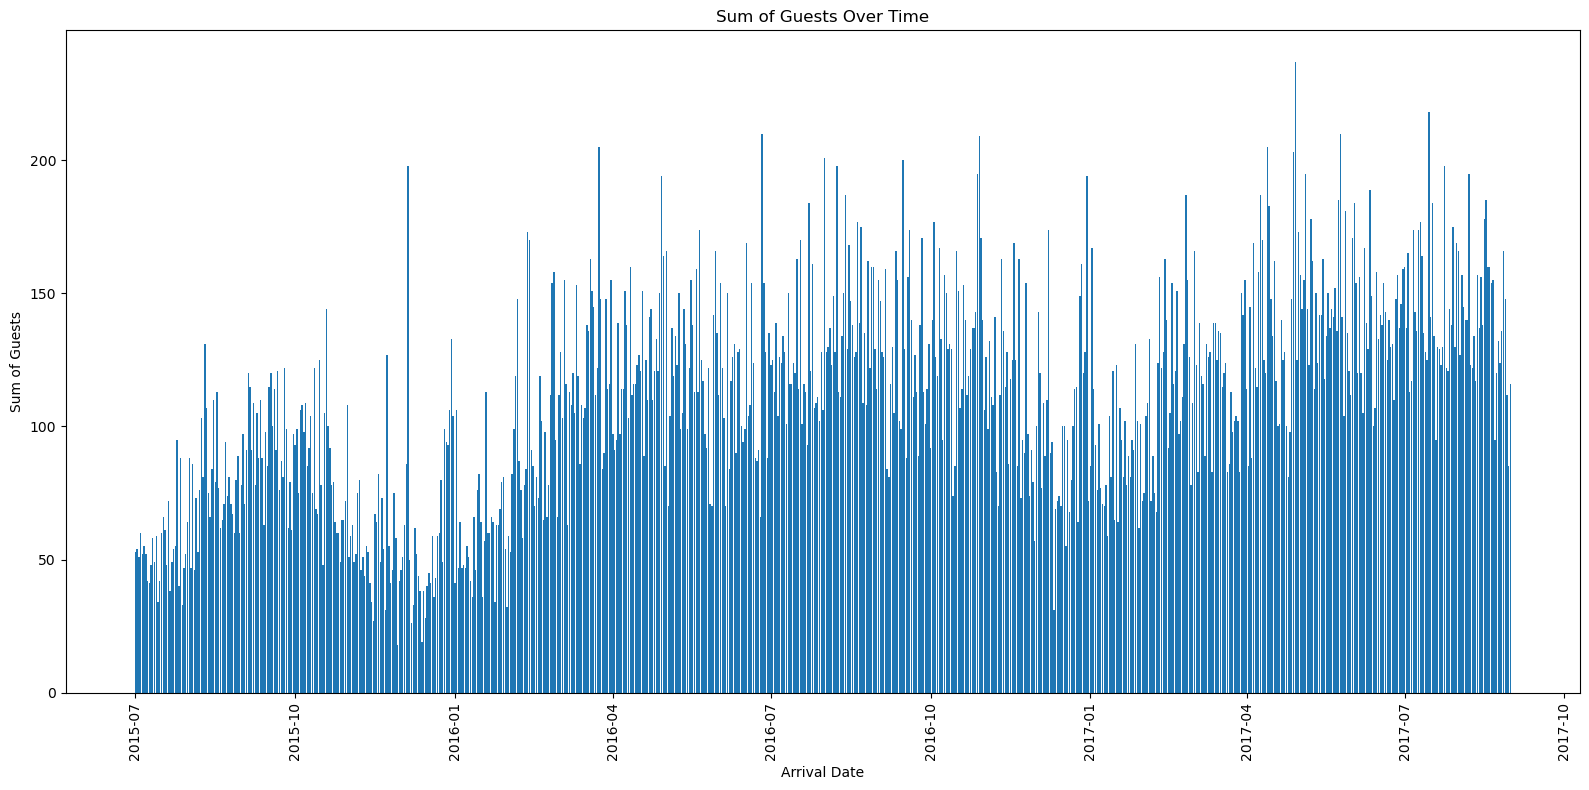

In [165]:
plt.figure(figsize=(16, 8))
plt.bar(guest_f['arrival_date'], guest_f['Sum of Guests'])
plt.title('Sum of Guests Over Time')
plt.xlabel('Arrival Date')
plt.ylabel('Sum of Guests')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

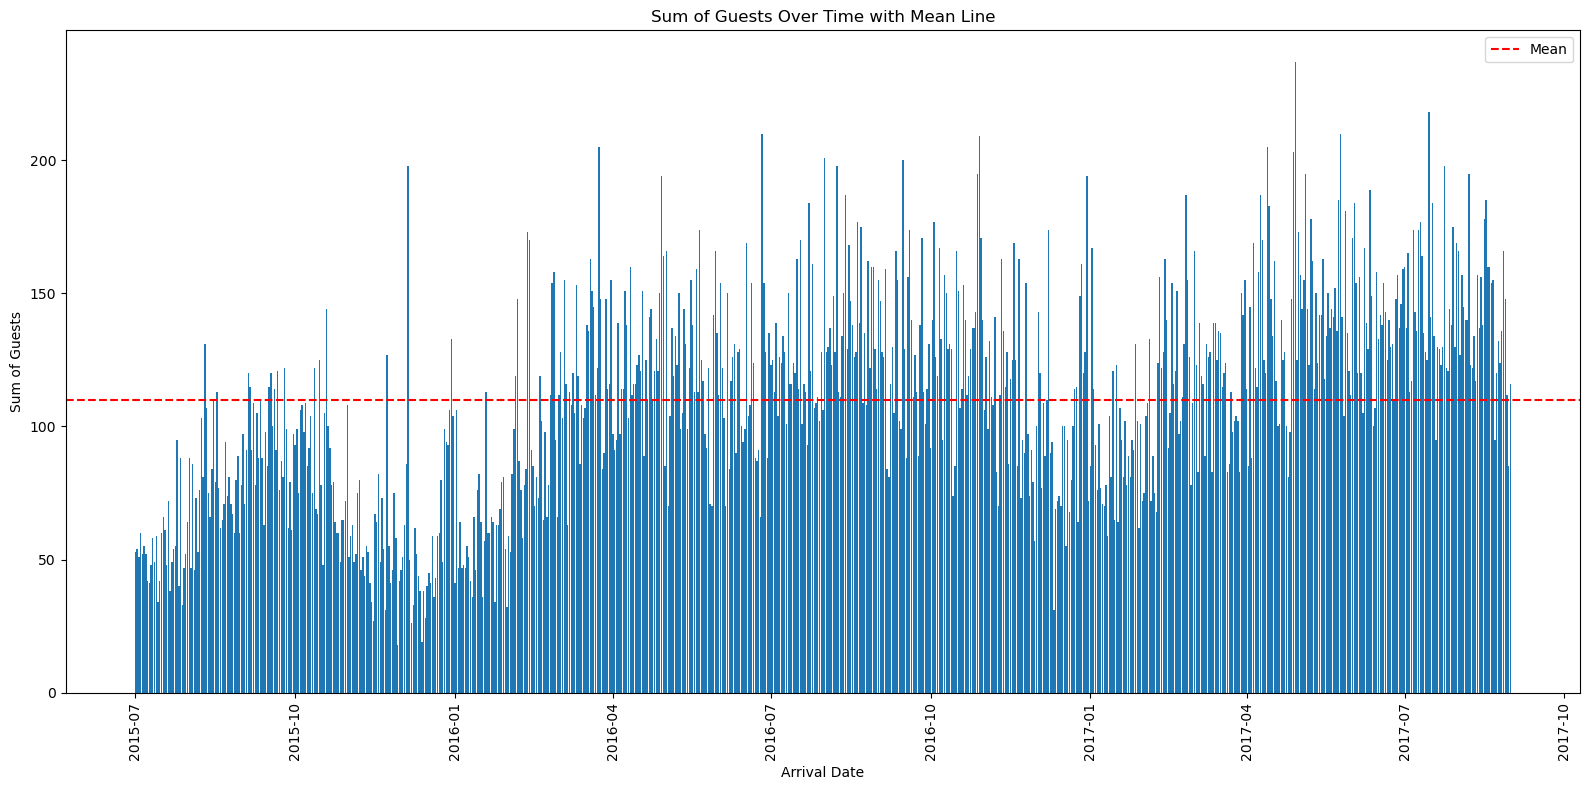

In [166]:
plt.figure(figsize=(16, 8))
plt.bar(guest_f['arrival_date'], guest_f['Sum of Guests'])
plt.axhline(y=guest_f['Sum of Guests'].mean(), color='red', linestyle='--', label='Mean')
plt.title('Sum of Guests Over Time with Mean Line')
plt.xlabel('Arrival Date')
plt.ylabel('Sum of Guests')
plt.xticks(rotation=90)
plt.legend()  # Add a legend to the plot
plt.tight_layout()
plt.show()

In [ ]:
#The red line shows the aveage no. of guests